In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'C:\Users\A2010578\OneDrive\Github\EBA-3500\solutions':
  os.chdir(r'C:\Users\A2010578\OneDrive\Github\EBA-3500\solutions')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\A2010578\AppData\Local\Temp\ipykernel_10748\1789965837.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap_external.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\codecs.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\aliases.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\__init__.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\utf_8.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\abc.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\io.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\stat.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Pyth

In [2]:
import numpy as np
import pandas as pd
weekly = pd.read_csv("data/Weekly.csv")
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [3]:
weekly["Direction"].replace({"Up": 1, "Down": 0}, inplace = True)

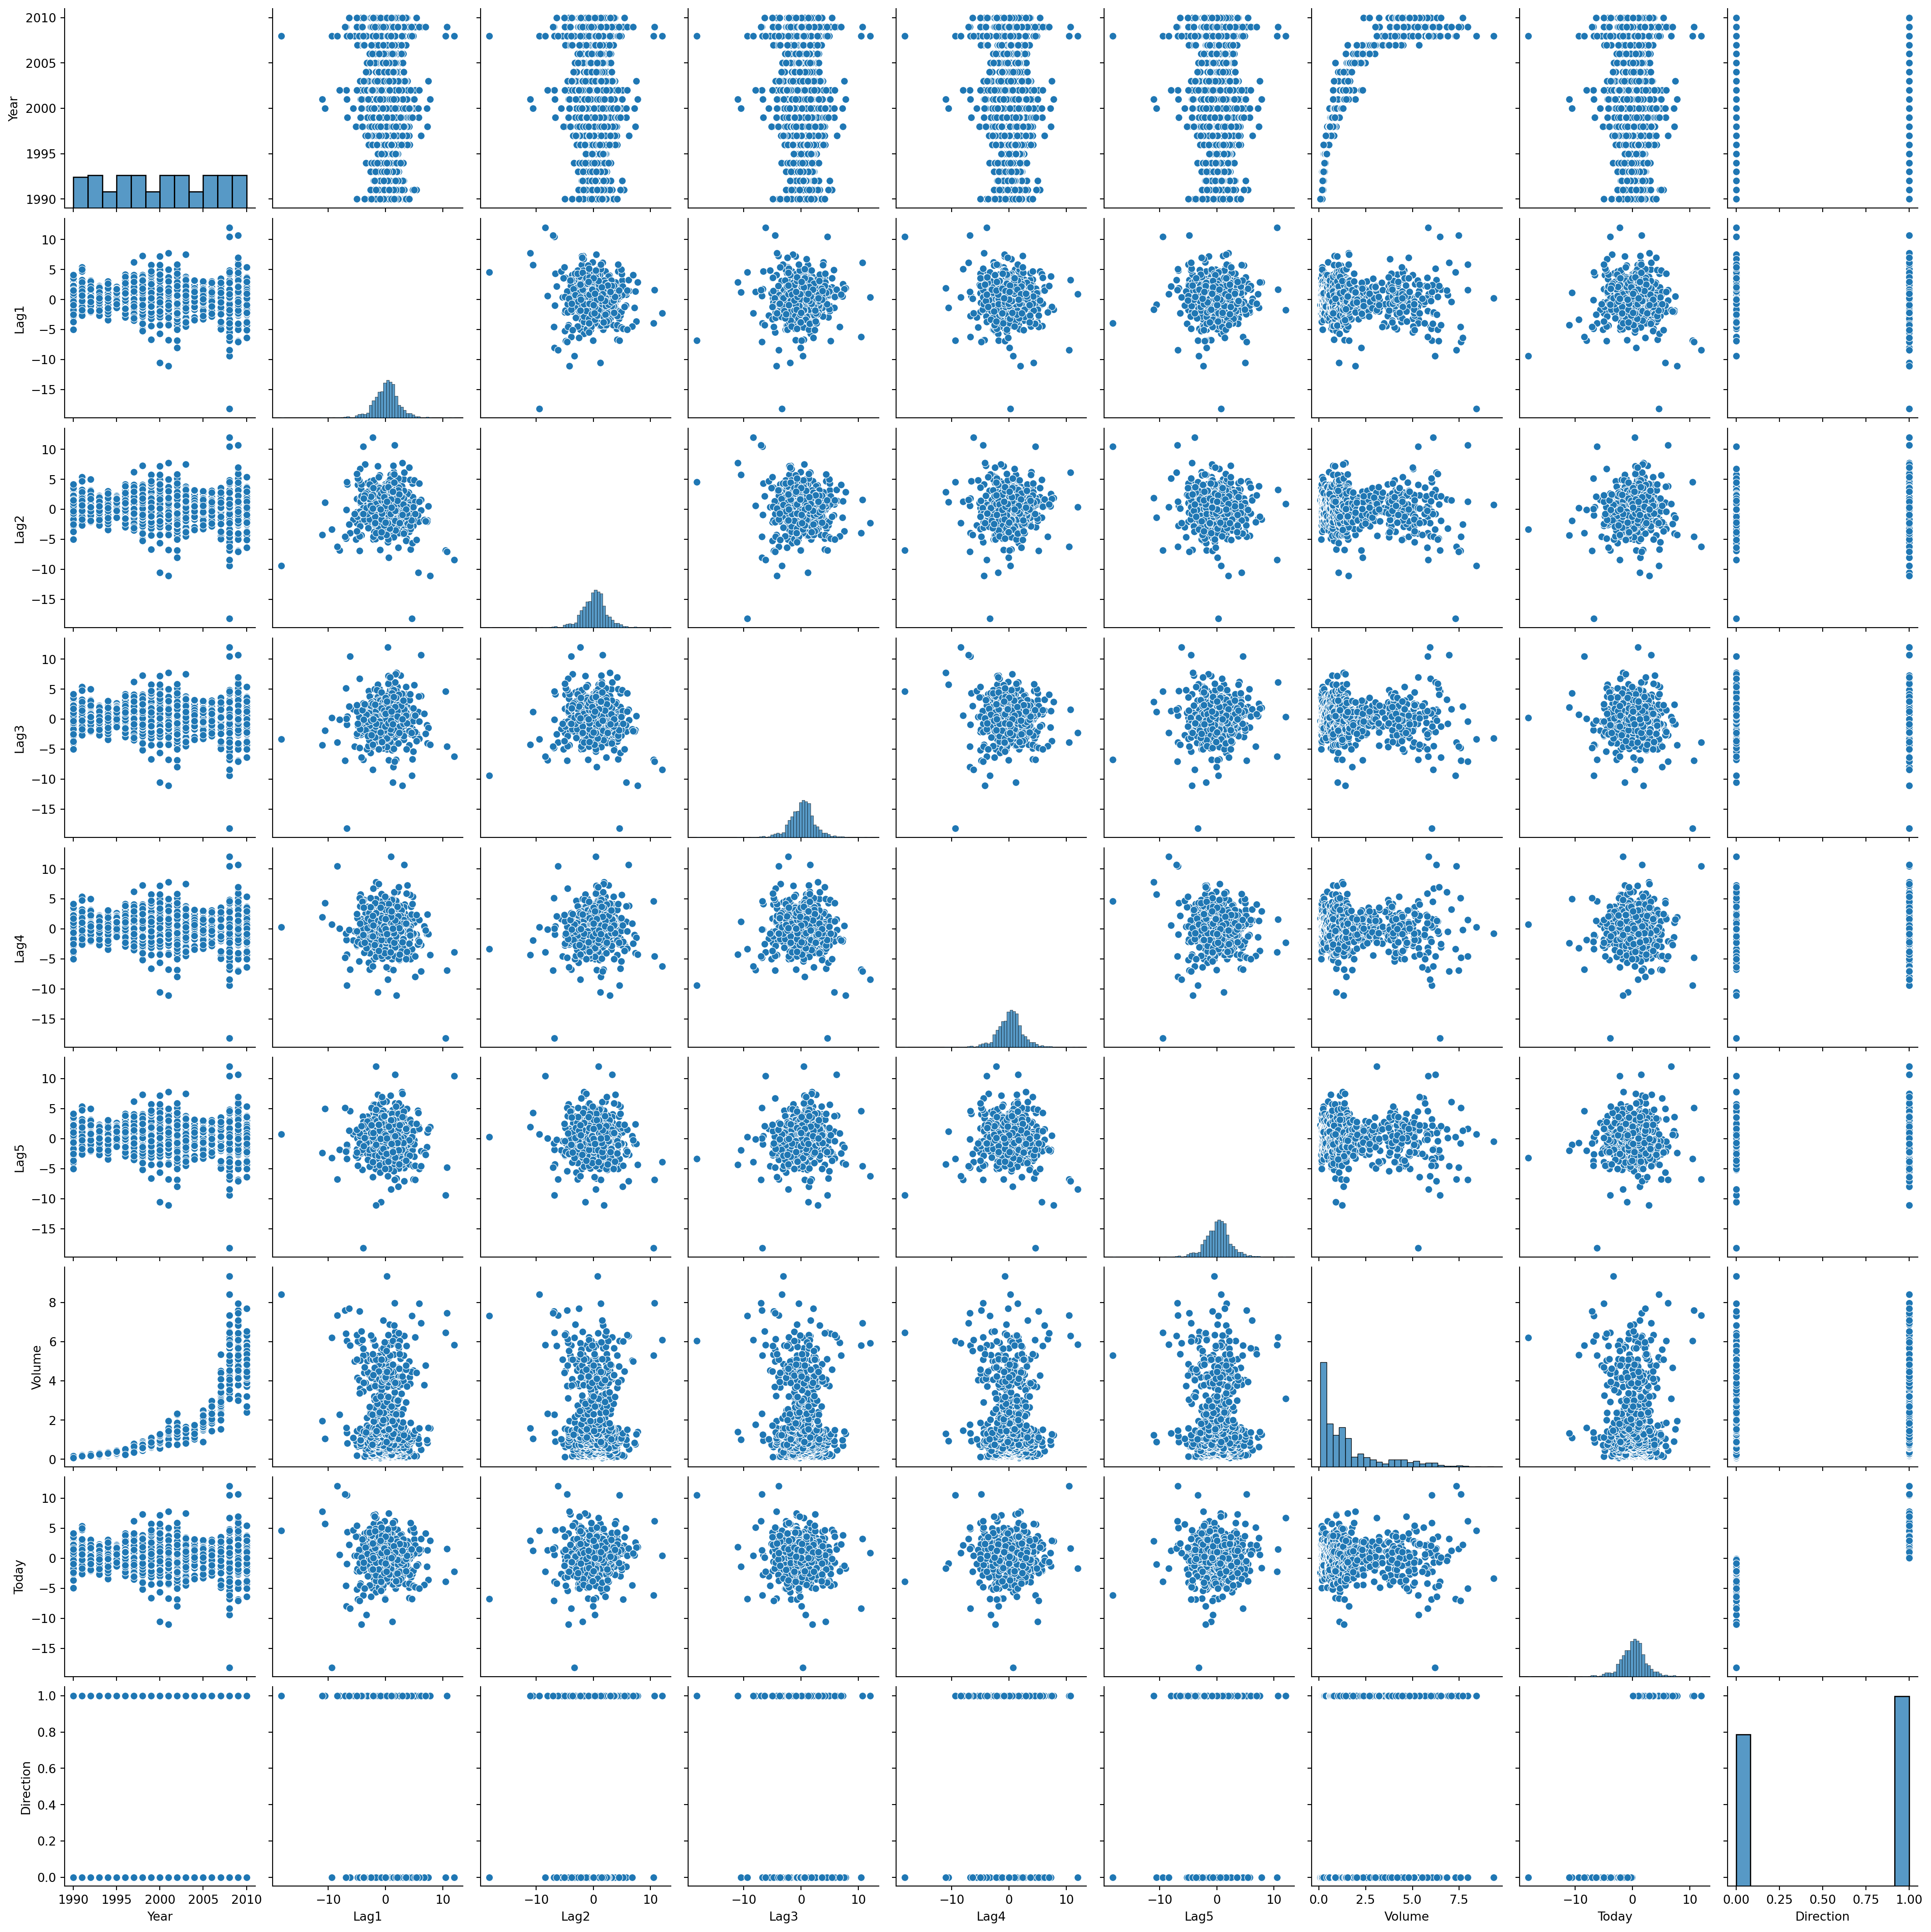

In [4]:
import seaborn as sns
import matplotlib.pylab as plt
sns.pairplot(weekly)
plt.show()

In [5]:
weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460,-0.022200
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032,-0.050004
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167,0.072696
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244,-0.022913
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826,-0.020549
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013,-0.018168
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078,-0.017995
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000,0.720025
Direction,-0.022200,-0.050004,0.072696,-0.022913,-0.020549,-0.018168,-0.017995,0.720025,1.000000


In [6]:
import statsmodels.formula.api as smf
fit = smf.logit("Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume", data = weekly).fit(disp=0)

In [7]:
fit.pvalues

Intercept    0.001899
Lag1         0.118144
Lag2         0.029601
Lag3         0.546924
Lag4         0.293653
Lag5         0.583348
Volume       0.537675
dtype: float64

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(weekly["Direction"], fit.predict() > 0.5) / weekly.shape[0]

array([[0.04958678, 0.39485767],
       [0.04407713, 0.51147842]])

In [9]:
confusion_matrix(weekly["Direction"], fit.predict() > 0.55) / weekly.shape[0]

array([[0.20936639, 0.23507805],
       [0.22222222, 0.33333333]])

In [10]:
data_train = weekly[weekly["Year"] < 2009]
data_test = weekly[weekly["Year"] > 2008]

In [11]:
fit_lag2 = smf.logit("Direction ~ Lag2", data = data_train).fit(disp=0)
mat = confusion_matrix(data_test["Direction"], fit_lag2.predict(data_test) > 0.50) / data_test.shape[0]
mat

array([[0.08653846, 0.32692308],
       [0.04807692, 0.53846154]])

In [12]:
np.trace(mat)

0.625

In [13]:
x_train = data_train["Lag2"].to_frame()
y_train = data_train["Direction"]
x_test = data_test["Lag2"].to_frame()
y_test = data_test["Direction"]

def confusion(fitter, cutoff = 0.5, normalized = True):
  """Return the confusion matrix for fitter object evaluated at our data."""
  fitted = fitter.fit(x_train, y_train)
  confusion_ = confusion_matrix(y_test, fitted.predict(x_test) > cutoff)
  confusion = confusion_ if not normalized else confusion_ / x_train.shape[0]
  return {"confusion": confusion, "success_prob": np.trace(confusion) / confusion.sum()}

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
confusion(LDA())

{'confusion': array([[0.00913706, 0.03451777],
        [0.00507614, 0.05685279]]),
 'success_prob': 0.625}

In [15]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
confusion(QDA())

{'confusion': array([[0.        , 0.04365482],
        [0.        , 0.06192893]]),
 'success_prob': 0.5865384615384616}

In [16]:
from sklearn.neighbors import KNeighborsClassifier
confusion(KNeighborsClassifier(n_neighbors=1))

{'confusion': array([[0.02233503, 0.0213198 ],
        [0.03045685, 0.03147208]]),
 'success_prob': 0.5096153846153846}

In [17]:
from sklearn.naive_bayes import GaussianNB
confusion(GaussianNB())

{'confusion': array([[0.        , 0.04365482],
        [0.        , 0.06192893]]),
 'success_prob': 0.5865384615384616}

In [18]:
data_train = weekly[weekly["Year"] < 2009]
data_test = weekly[weekly["Year"] > 2008]
x_train = data_train.drop(["Direction", "Today", "Year"],axis=1)
y_train = data_train["Direction"]
x_test = data_test.drop(["Direction", "Today", "Year"],axis=1)
y_test = data_test["Direction"]
x_test.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
985,6.760,-1.698,0.926,0.418,-2.251,3.793110
986,-4.448,6.760,-1.698,0.926,0.418,5.043904
987,-4.518,-4.448,6.760,-1.698,0.926,5.948758
988,-2.137,-4.518,-4.448,6.760,-1.698,6.129763
989,-0.730,-2.137,-4.518,-4.448,6.760,5.602004


In [19]:
def confusion2(fitter, indices):
  """Return the confusion matrix for fitter object evaluated at our data."""
  fitted = fitter.fit(x_train.iloc[:,indices], y_train)
  confusion = confusion_matrix(y_test, fitted.predict(x_test.iloc[:,indices]) > 0.5)
  norm = confusion.sum()
  return {"confusion": confusion / norm, "success_prob": np.trace(confusion) / norm}

In [20]:
x_train.iloc[:,[0,1,4]].head()

,Lag1,Lag2,Lag5
0,0.816,1.572,-3.484
1,-0.270,0.816,-0.229
2,-2.576,-0.270,-3.936
3,3.514,-2.576,1.572
4,0.712,3.514,0.816


In [21]:
confusion2(LDA(), [0,1,4])

{'confusion': array([[0.07692308, 0.33653846],
        [0.10576923, 0.48076923]]),
 'success_prob': 0.5576923076923077}

In [22]:
from sklearn.linear_model import LogisticRegression
indices = [0,1,4]
fitters = {LogisticRegression(),LDA(),QDA(),GaussianNB()}
{fitter:round(confusion2(fitter, indices)["success_prob"],3) for fitter in fitters}

{QuadraticDiscriminantAnalysis(): 0.481,
 LogisticRegression(): 0.558,
 GaussianNB(): 0.49,
 LinearDiscriminantAnalysis(): 0.558}

In [23]:
success = lambda indices: {fitter:round(confusion2(fitter, indices)["success_prob"],3) for fitter in fitters}

In [24]:
frame = pd.DataFrame([success([0,1,2,3,4]),
  success([0,1,2,3]),
  success([1,2,3]),
  success([1,2]),
  success([1])], index = ["[0,1,2,3,4]","[0,1,2,3]","[1,2,3]","[1,2]","[1]"])
  
frame

,QuadraticDiscriminantAnalysis(),LogisticRegression(),GaussianNB(),LinearDiscriminantAnalysis()
"[0,1,2,3,4]",0.462,0.548,0.481,0.548
"[0,1,2,3]",0.519,0.587,0.510,0.577
"[1,2,3]",0.548,0.615,0.558,0.615
"[1,2]",0.606,0.625,0.587,0.625
[1],0.587,0.625,0.587,0.625


In [25]:
fit = smf.logit("Direction ~ Lag2*Lag3", data = data_train).fit(disp=0)
mat = confusion_matrix(data_test["Direction"], fit.predict(data_test) > 0.50) / data_test.shape[0]
print(f"Confusion matrix {mat}")
print(f"Success probability: {np.trace(mat)}")

Confusion matrix [[0.07692308 0.33653846]
 [0.03846154 0.54807692]]
Success probability: 0.625


In [26]:
fit = smf.logit("Direction ~ Lag2 + I(Lag2**2)", data = data_train).fit(disp=0)
mat = confusion_matrix(data_test["Direction"], fit.predict(data_test) > 0.50) / data_test.shape[0]
print(f"Confusion matrix {mat}")
print(f"Success probability: {np.trace(mat)}")

Confusion matrix [[0.07692308 0.33653846]
 [0.03846154 0.54807692]]
Success probability: 0.625


In [27]:
fit = smf.logit("Direction ~ Lag2 + I(Lag2**2) + Lag2*Lag3", data = data_train).fit(disp=0)
mat = confusion_matrix(data_test["Direction"], fit.predict(data_test) > 0.50) / data_test.shape[0]
print(f"Confusion matrix {mat}")
print(f"Success probability: {np.trace(mat)}")

Confusion matrix [[0.03846154 0.375     ]
 [0.01923077 0.56730769]]
Success probability: 0.6057692307692307
